# K-Means Clustering Algorithm 파이썬 구현

## 1. 데이터 불러오기
## 2. 데이터 파악
## 3. 데이터 시각화
## 4. 클러스터 개수 k 설정 및 k개의 클러스터에 데이터 랜덤하게 할당

> 4.1. 클러스터 개수 k 설정

> 4.2. k개의 클러스터에 데이터 랜덤 할당
## 5. 각 클러스터의 평균(centroid)를 구하고, 평가값 계산

> 5.1. 각 클러스터의 평균(centroid) 계산

> 5.2. 각 클러스터 안에 있는 모든 데이터에서 평균(centroid)까지의 거리 합 계산

> 5.3. 평가값 산출

## 6. 모든 데이터를 k개의 평균(centroid) 중에서 가장 가까운 클러스터로 재할당하여 **새로운 클러스터 해 구성**

## 7. 클러스터 해의 변화가 있는지 확인

> 7.1. 새로운 클러스터의 평균(centroid) 계산

> 7.2. 이전의 centroids와 새로운 centroids 비교

## 8. 변화가 있다면 6번으로 다시 돌아가서 반복하고, 변화가 없다면 결과값 출력

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. 데이터 불러오기

In [ ]:
ruspini = pd.read_table("ruspini.txt", sep=" ")
ruspini

,x,y
0,4,53
1,5,63
2,10,59
3,9,77
4,13,49
...,...,...
70,66,23
71,61,25
72,76,27
73,72,31


## 2. 데이터 파악

In [ ]:
ruspini.describe()

,x,y
count,75.00000,75.000000
mean,54.88000,92.026667
std,30.50253,48.702620
min,4.00000,4.000000
25%,31.50000,56.500000
50%,52.00000,96.000000
75%,76.50000,141.500000
max,117.00000,156.000000


In [ ]:
ruspini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       75 non-null     int64
 1   y       75 non-null     int64
dtypes: int64(2)
memory usage: 1.3 KB


## 3. 데이터 시각화

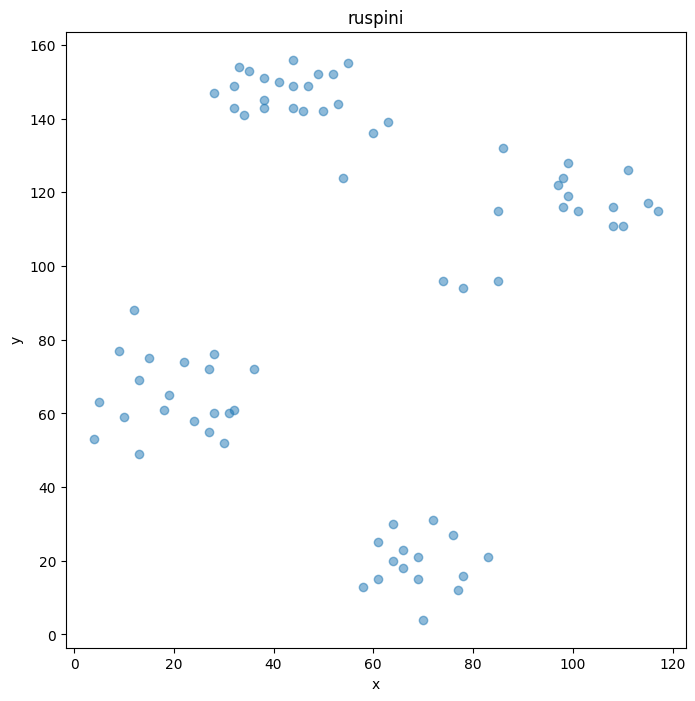

In [ ]:

x = ruspini['x']
y = ruspini['y']

plt.figure(figsize=(8,8))
plt.scatter(x,y,alpha=0.5)
plt.title('ruspini')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 4. 클러스터 개수 k 설정 및 k개의 클러스터에 데이터 랜덤하게 할당

> 4.1. 클러스터 개수 k 설정

> 4.2. k개의 클러스터에 데이터 랜덤 할당







### 4.1. 클러스터 개수 k 설정


In [ ]:
k = int(input("설정할 클러스터 개수를 입력하시오: "))

설정할 클러스터 개수를 입력하시오: 4


### 4.2. k개의 클러스터에 데이터 랜덤 할당

In [ ]:
X = np.array(ruspini)
X

array([[  4,  53],
       [  5,  63],
       [ 10,  59],
       [  9,  77],
       [ 13,  49],
       [ 13,  69],
       [ 12,  88],
       [ 15,  75],
       [ 18,  61],
       [ 19,  65],
       [ 22,  74],
       [ 27,  72],
       [ 28,  76],
       [ 24,  58],
       [ 27,  55],
       [ 28,  60],
       [ 30,  52],
       [ 31,  60],
       [ 32,  61],
       [ 36,  72],
       [ 28, 147],
       [ 32, 149],
       [ 35, 153],
       [ 33, 154],
       [ 38, 151],
       [ 41, 150],
       [ 38, 145],
       [ 38, 143],
       [ 32, 143],
       [ 34, 141],
       [ 44, 156],
       [ 44, 149],
       [ 44, 143],
       [ 46, 142],
       [ 47, 149],
       [ 49, 152],
       [ 50, 142],
       [ 53, 144],
       [ 52, 152],
       [ 55, 155],
       [ 54, 124],
       [ 60, 136],
       [ 63, 139],
       [ 86, 132],
       [ 85, 115],
       [ 85,  96],
       [ 78,  94],
       [ 74,  96],
       [ 97, 122],
       [ 98, 116],
       [ 98, 124],
       [ 99, 119],
       [ 99,

In [ ]:
# 각 데이터에 대해 랜덤한 클러스터 선택
cluster_labels = np.random.choice(k, size=len(X))

# 각 클러스터에 속하는 데이터들을 저장할 빈 리스트 생성
clusters = [[] for _ in range(k)]

# 모든 데이터에 대해, 해당하는 클러스터 리스트에 추가
for i in range(len(X)):
    clusters[cluster_labels[i]].append(X[i])

# numpy array로 변환
clusters = [np.array(cluster) for cluster in clusters]
print("클러스터: ", clusters, sep='\n')
print("각 데이터의 클러스터 index: ", cluster_labels, sep='\n')

클러스터: 
[array([[  4,  53],
       [ 12,  88],
       [ 19,  65],
       [ 28,  60],
       [ 31,  60],
       [ 32,  61],
       [ 38, 151],
       [ 41, 150],
       [ 32, 143],
       [ 44, 156],
       [ 44, 149],
       [ 47, 149],
       [ 50, 142],
       [ 53, 144],
       [ 52, 152],
       [ 86, 132],
       [ 85, 115],
       [ 85,  96],
       [ 99, 119],
       [ 99, 128],
       [ 69,  15],
       [ 64,  20],
       [ 69,  21],
       [ 61,  25]]), array([[ 13,  49],
       [ 15,  75],
       [ 27,  72],
       [ 24,  58],
       [ 38, 143],
       [ 44, 143],
       [ 46, 142],
       [ 49, 152],
       [ 55, 155],
       [ 54, 124],
       [ 63, 139],
       [ 78,  94],
       [ 74,  96],
       [ 97, 122],
       [101, 115],
       [110, 111],
       [117, 115],
       [ 70,   4],
       [ 77,  12],
       [ 66,  23],
       [ 76,  27]]), array([[  5,  63],
       [ 10,  59],
       [ 13,  69],
       [ 18,  61],
       [ 22,  74],
       [ 30,  52],
       [ 35, 153],



> 클러스터 시각화



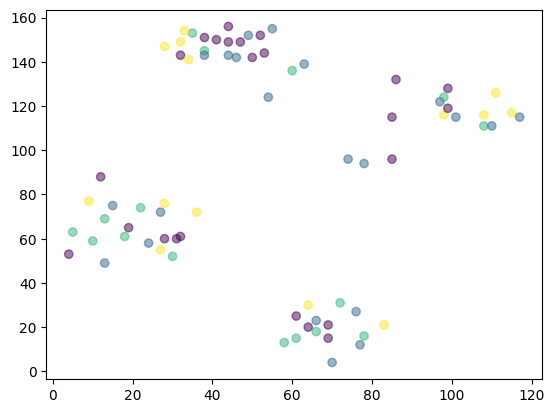

In [ ]:
plt.scatter(x, y, c=cluster_labels, alpha=0.5)
plt.show()

## 5. 각 클러스터의 평균(centroid)를 구하고, 평가값 계산

> 5.1. 각 클러스터의 평균(centroid) 계산

> 5.2. 각 클러스터 안에 있는 모든 데이터에서 평균(centroid)까지의 거리 합 계산

> 5.3. 평가값 산출







### 5.1. 각 클러스터의 평균(centroid) 계산

In [ ]:
# 각 클러스터의 centroid 계산

# centroids = []
# for cluster in clusters:
#   centroid = np.mean(cluster, axis=0)
#   centroids.append(centroid)

centroids = [np.mean(cluster, axis=0) for cluster in clusters]  # axis=0으로 x, y끼리 계산

# numpy array로 변환
centroids = np.array(centroids)

print("Centroids:", centroids, sep='\n')

Centroids:
[[51.83333333 99.75      ]
 [61.61904762 93.85714286]
 [48.25       71.25      ]
 [57.57142857 99.78571429]]



> centroids 시각화



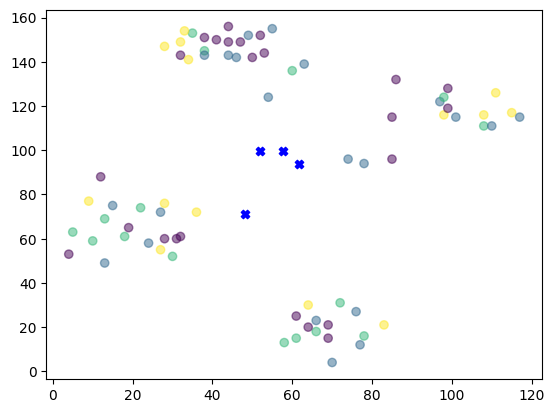

In [ ]:
plt.scatter(x, y, c=cluster_labels, alpha=0.5)
plt.scatter(centroids[:,0], centroids[:,1], c='blue', marker='X')	# centroids는 파란색 X표시 입니다.
plt.show()

### 5.2. 각 클러스터 안에 있는 모든 데이터에서 평균(centroid)까지의 거리 합 계산
- 강의록 2. K-means 설명_6p 참고
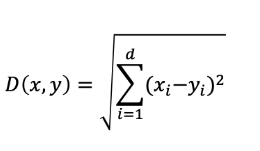

In [ ]:
distance_sums = []

for i in range(len(clusters)):
  cluster = clusters[i]
  centroid = centroids[i]

  distance_sum = np.sum(np.sqrt(np.sum((cluster - centroid)**2, axis=1)))   # axis=1로 cluster안의 데이터의 x값 - centroid의 x값, y값을 구할 수 있음

  distance_sums.append(distance_sum)

print("각 centroid까지의 거리 합: ", distance_sums, sep='\n')

각 centroid까지의 거리 합: 
[1283.8453284023394, 1106.3226106919453, 854.0841003481747, 768.0403563638317]


### 5.3. 평가값 산출

In [ ]:
total_distance = np.sum(distance_sums)
print("평가값: ", total_distance)

평가값:  4012.292395806291


## 6. 모든 데이터를 k개의 평균(centroid) 중에서 가장 가까운 클러스터로 재할당하여 새로운 클러스터 해 구성

In [ ]:
# 새로운 클러스터와 레이블을 저장할 빈 리스트 생성
cluster_labels = np.zeros(len(X))
new_clusters = [[] for _ in range(len(centroids))]

# 모든 데이터에 대해 반복
for i, data in enumerate(X):

  # 각 데이터의 centroid와의 거리 계산
  distances = [np.sqrt(np.sum((data - centroid)**2)) for centroid in centroids]

  # 가장 가까운 centroid의 인덱스 반환
  closest_centroid_index = np.argmin(distances)

  # 해당 클러스터에 데이터 추가 및 레이블 할당
  new_clusters[closest_centroid_index].append(data)
  cluster_labels[i] = closest_centroid_index  # 위에서 찾은 가장 가까운 centroid의 인덱스가 클러스터 레이블이 됨

# 새로운 클러스터를 numpy array로 변환
new_clusters = [np.array(cluster) for cluster in new_clusters]

print("새로운 클러스터: ", new_clusters, sep='\n')
print("클러스터 번호: ", cluster_labels, sep='\n')

새로운 클러스터: 
[array([[ 28, 147],
       [ 32, 149],
       [ 35, 153],
       [ 33, 154],
       [ 38, 151],
       [ 41, 150],
       [ 38, 145],
       [ 38, 143],
       [ 32, 143],
       [ 34, 141],
       [ 44, 156],
       [ 44, 149],
       [ 44, 143],
       [ 46, 142],
       [ 47, 149],
       [ 49, 152],
       [ 50, 142],
       [ 53, 144],
       [ 52, 152],
       [ 54, 124]]), array([[ 85,  96],
       [ 78,  94],
       [ 74,  96],
       [ 97, 122],
       [ 98, 116],
       [ 99, 119],
       [101, 115],
       [108, 111],
       [110, 111],
       [108, 116],
       [111, 126],
       [115, 117],
       [117, 115]]), array([[ 4, 53],
       [ 5, 63],
       [10, 59],
       [ 9, 77],
       [13, 49],
       [13, 69],
       [12, 88],
       [15, 75],
       [18, 61],
       [19, 65],
       [22, 74],
       [27, 72],
       [28, 76],
       [24, 58],
       [27, 55],
       [28, 60],
       [30, 52],
       [31, 60],
       [32, 61],
       [36, 72],
       [70,  4],



> 새로운 클러스터 시각화



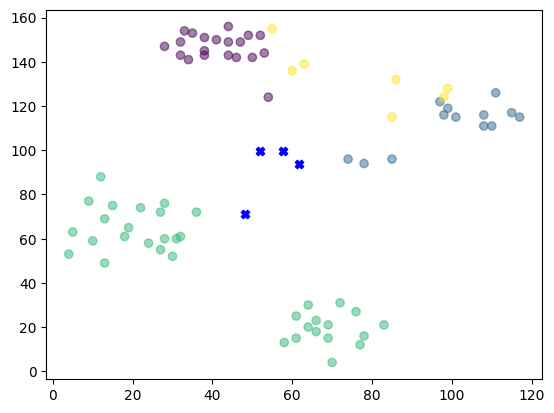

In [ ]:
plt.scatter(x, y, c=cluster_labels, alpha=0.5)
plt.scatter(centroids[:,0], centroids[:,1], c='blue', marker='X')	# centroids는 파란색 X표시 입니다.
plt.show()

## 7. 클러스터 해의 변화가 있는지 확인

> 7.1. 새로운 클러스터의 평균(centroid) 계산

> 7.2. 이전의 centroids와 새로운 centroids 비교











### 7.1. 새로운 클러스터의 평균(centroid) 계산

In [ ]:
new_centroids = [np.mean(cluster, axis=0) for cluster in new_clusters]  # axis=0으로 x, y끼리 각각 계산

# numpy array로 변환
new_centroids = np.array(new_centroids)

print("Centroids:", new_centroids, sep='\n')

Centroids:
[[ 41.6        146.45      ]
 [100.07692308 111.84615385]
 [ 41.05714286  45.42857143]
 [ 78.         132.71428571]]


### 7.2. 이전의 centroids와 새로운 centroids 비교




> 이전의 centroids와 새로운 centroids의 비교 시각화



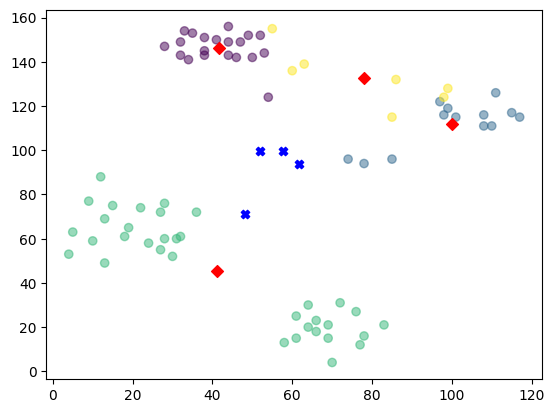

In [ ]:
plt.scatter(x, y, c=cluster_labels, alpha=0.5)
plt.scatter(centroids[:,0], centroids[:,1], c='blue', marker='X')  # centroids는 파란색 X 표시입니다.
plt.scatter(new_centroids[:,0], new_centroids[:,1], c='red', marker='D')  # new_centroids는 빨간색 다이아 표시입니다.
plt.show()

In [ ]:
error = np.zeros((k, centroids.shape[1]))   # .shape[1]: 열 개수, .shape[0]: 행 개수
for i in range(k):
  error[i] = np.sqrt(np.sum((centroids[i] - new_centroids[i])**2))
print("이전의 centroid와의 오차: ", error, sep='\n')
print("========================================================")

if error.all() != 0:
  print("새로운 클러스터를 구성을 반복하시오")

if error.all() == 0:
  print("최종 클러스터: ", clusters, sep='\n')
  print("클러스터 레이블: ", cluster_labels, sep='\n')
  print("최종 평가값: ", total_distance, sep='\n')
  plt.scatter(x, y, c=cluster_labels, alpha=0.5)
  plt.scatter(new_centroids[:,0], new_centroids[:,1], c='red', marker='D')
  plt.show()

이전의 centroid와의 오차: 
[[47.80806534 47.80806534]
 [42.45718668 42.45718668]
 [26.80454005 26.80454005]
 [38.7507077  38.7507077 ]]
새로운 클러스터를 구성을 반복하시오
